In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileList = glob.glob("../Datasets/Dataset_2/*/*.csv")

In [3]:
df = pd.DataFrame.from_dict(fileList)
df.rename(columns={0:"path"},inplace = True)

In [4]:
df["file"] = df["path"].apply(lambda x: x.split("/")[-1])


In [5]:
df.head()

,path,file
0,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...
1,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...
2,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...
3,../Datasets/Dataset_2/User30/179_MetaWear_2022...,179_MetaWear_2022-04-19T12.53.09.742_EB942CED9...
4,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...


In [6]:
df["expID"] = df["file"].apply(lambda x: x.split("_")[0])

In [7]:
df.head()

,path,file,expID
0,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...,178
1,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...,180
2,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...,180
3,../Datasets/Dataset_2/User30/179_MetaWear_2022...,179_MetaWear_2022-04-19T12.53.09.742_EB942CED9...,179
4,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...,178


In [21]:
df.loc[0,"file"]

'178_MetaWear_2022-04-19T12.50.21.297_EB942CED9472_Magnetometer_20.000Hz_1.5.1.csv'

In [8]:
df.loc[0,"file"].split("_")[4]

'Magnetometer'

In [9]:
df.loc[0,"file"].split("_")[5]

'20.000Hz'

In [10]:
df["sensor"] = df["file"].apply(lambda x: x.split("_")[4])
df["frequency"] = df["file"].apply(lambda x: x.split("_")[5])

In [11]:
df.head()

,path,file,expID,sensor,frequency
0,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...,178,Magnetometer,20.000Hz
1,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...,180,Gyroscope,100.000Hz
2,../Datasets/Dataset_2/User30/180_MetaWear_2022...,180_MetaWear_2022-04-19T12.55.46.650_EB942CED9...,180,Accelerometer,100.000Hz
3,../Datasets/Dataset_2/User30/179_MetaWear_2022...,179_MetaWear_2022-04-19T12.53.09.742_EB942CED9...,179,Accelerometer,100.000Hz
4,../Datasets/Dataset_2/User30/178_MetaWear_2022...,178_MetaWear_2022-04-19T12.50.21.297_EB942CED9...,178,Accelerometer,100.000Hz


In [12]:
df["expID"] = df["expID"].astype("int32")

In [13]:
df.sort_values(by="expID",inplace=True)

In [15]:
# Dropping rows where our required sensors are not present in the experiment

required_sensors = {"Accelerometer", "Gyroscope"}

df_filtered = (
    df.groupby("expID")
      .filter(lambda x: required_sensors.issubset(set(x["sensor"])))
)

In [16]:
expDic = {
    1 : "Sitting and Reading a book", 
    2 : "Sitting and Working on a computer", 
    3 : "Standing up from sitting",
    4 : "Walking", 
    5 : "Standing and picking up items from the floor", 
    6 : "TUG test",
}

def exp_No(expID):
    if expID%6 == 0:
        return 6
    return expID % 6

def exp_Name(exp_No):
    return expDic[exp_No]

In [18]:
df["exp_No"] = df["expID"].apply(exp_No)
df["exp_Name"] = df["exp_No"].apply(exp_Name)

In [19]:
pd.set_option('display.max_rows', None)

In [20]:
df.head()

,path,file,expID,sensor,frequency,exp_No,exp_Name
474,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Pressure,7.330Hz,1,Sitting and Reading a book
491,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Magnetometer,20.000Hz,1,Sitting and Reading a book
488,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Gyroscope,100.000Hz,1,Sitting and Reading a book
476,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Accelerometer,100.000Hz,1,Sitting and Reading a book
480,../Datasets/Dataset_2/User1/2_MetaWear_2021-10...,2_MetaWear_2021-10-29T10.21.54.891_EB942CED947...,2,Magnetometer,20.000Hz,2,Sitting and Working on a computer


## Check the frequency

In [21]:
df.drop_duplicates(subset=["frequency","sensor"])

,path,file,expID,sensor,frequency,exp_No,exp_Name
474,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Pressure,7.330Hz,1,Sitting and Reading a book
491,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Magnetometer,20.000Hz,1,Sitting and Reading a book
488,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Gyroscope,100.000Hz,1,Sitting and Reading a book
476,../Datasets/Dataset_2/User1/1_MetaWear_2021-10...,1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...,1,Accelerometer,100.000Hz,1,Sitting and Reading a book
30,../Datasets/Dataset_2/User31/186_MetaWearA0_20...,186_MetaWearA0_2022-04-25T11.32.39.882_D645537...,186,Pressure,3.820Hz,6,TUG test


# Visuals

In [24]:
def fig_presure(file):
    data_pre = pd.read_csv(file)
    data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

    # strs = file.split('\\')[6].split('_')
    # label = strs[0] + '-' + strs[4]
    label = "1" + '-' + "Pressure"
    data_pre = data_pre[['pressure']]
    data_pre = data_pre.reset_index(drop=True)
    axarr.plot(data_pre)
    # axarr.set_ylim(97200, 98000)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Pressure (unit)')
    axarr.set_title('Pressure: ' + label)

In [25]:
def fig_magnetometer(file):
    data_mag = pd.read_csv(file)
    data_mag.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Magnetometer'
    data_mag = data_mag[['x','y','z']]
    data_mag = data_mag.reset_index(drop=True)
    axarr.plot(data_mag*1000)
    axarr.set_ylim(-0.25, 0.25)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Magnetometer (unit)')
    axarr.set_title('Magnetometer: ' + label)

In [26]:
def fig_accelerometer(file):
    data_acc = pd.read_csv(file)
    data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-accelerometer'
    data_acc = data_acc[['x','y','z']]
    data_acc = data_acc.reset_index(drop=True)
    axarr.plot(data_acc)
    axarr.set_ylim(-2, 2)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Acceleration (m/s^2)')
    axarr.set_title('Accelerometer: ' + label)

In [27]:
def fig_gyroscope(file):
    data_gyr = pd.read_csv(file)
    data_gyr.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Gyroscope'


#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    data_gyr = data_gyr[['x','y','z']]
    data_gyr = data_gyr.reset_index(drop=True)
    axarr.plot(data_gyr)
    axarr.set_ylim(-160, 160)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Rotation (dgree/s^2)')
    axarr.set_title('Gyroscope: ' + label)

# Sitting and Reading a Book


In [28]:
# Reading Book Data
reading_book_df = df[df["exp_No"] == 1]

In [29]:
reading_book_df["sensor"].value_counts()

sensor
Pressure         35
Magnetometer     35
Gyroscope        35
Accelerometer    35
Name: count, dtype: int64

In [30]:
reading_book_df["expID"].value_counts()

expID
1      4
157    4
121    4
127    4
133    4
139    4
145    4
151    4
163    4
109    4
169    4
175    4
181    4
187    4
193    4
199    4
115    4
103    4
7      4
49     4
13     4
19     4
25     4
31     4
37     4
43     4
55     4
97     4
61     4
67     4
73     4
79     4
85     4
91     4
205    4
Name: count, dtype: int64

In [31]:
reading_book_df["sensor"]

474         Pressure
491     Magnetometer
488        Gyroscope
476    Accelerometer
49     Accelerometer
55          Pressure
60         Gyroscope
58      Magnetometer
122     Magnetometer
126         Pressure
128    Accelerometer
137        Gyroscope
112     Magnetometer
105         Pressure
103    Accelerometer
92         Gyroscope
89      Magnetometer
79     Accelerometer
72          Pressure
84         Gyroscope
459         Pressure
448        Gyroscope
465     Magnetometer
456    Accelerometer
500        Gyroscope
502         Pressure
517    Accelerometer
505     Magnetometer
445    Accelerometer
429        Gyroscope
427         Pressure
443     Magnetometer
521        Gyroscope
528    Accelerometer
529         Pressure
537     Magnetometer
619        Gyroscope
622         Pressure
617     Magnetometer
616    Accelerometer
743    Accelerometer
745         Pressure
746        Gyroscope
752     Magnetometer
258        Gyroscope
237         Pressure
238     Magnetometer
241    Accele

In [32]:
reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[0,:]

path         ../Datasets/Dataset_2/User1/1_MetaWear_2021-10...
file         1_MetaWear_2021-10-29T10.18.39.911_EB942CED947...
expID                                                        1
sensor                                                Pressure
frequency                                              7.330Hz
exp_No                                                       1
exp_Name                            Sitting and Reading a book
Name: 474, dtype: object

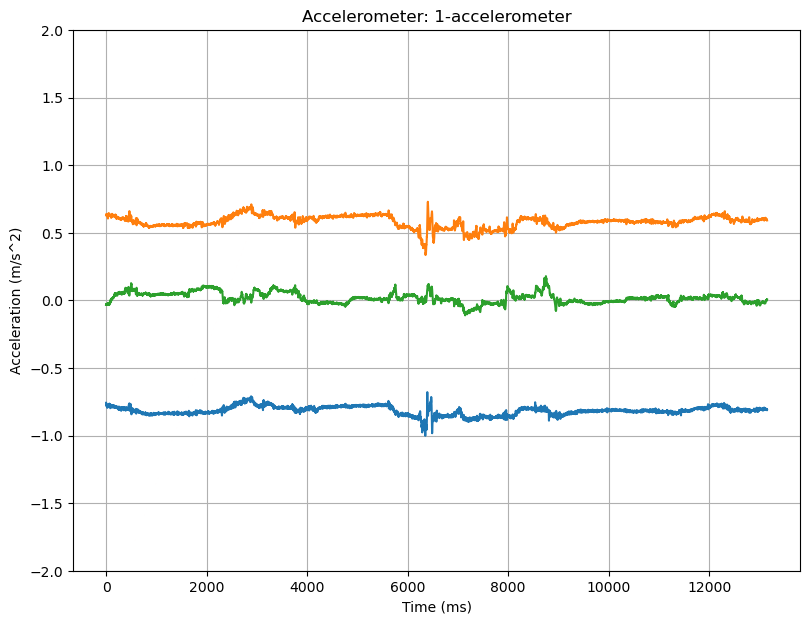

In [33]:
fig_accelerometer(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

In [34]:
data_acc = pd.read_csv(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])
data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
data_acc.describe()

,timestamp,elapsed,x,y,z
count,1.315400e+04,13154.000000,13154.000000,13154.000000,13154.00000
mean,1.635518e+12,65.765000,-0.816239,0.582195,0.01840
std,3.797377e+04,37.973771,0.032608,0.044508,0.03956
min,1.635518e+12,0.000000,-1.002000,0.335000,-0.11100
25%,1.635518e+12,32.882500,-0.836000,0.557000,-0.01000
50%,1.635518e+12,65.765000,-0.816000,0.586000,0.01500
75%,1.635519e+12,98.647500,-0.794000,0.613000,0.04300
max,1.635519e+12,131.530000,-0.679000,0.729000,0.17900


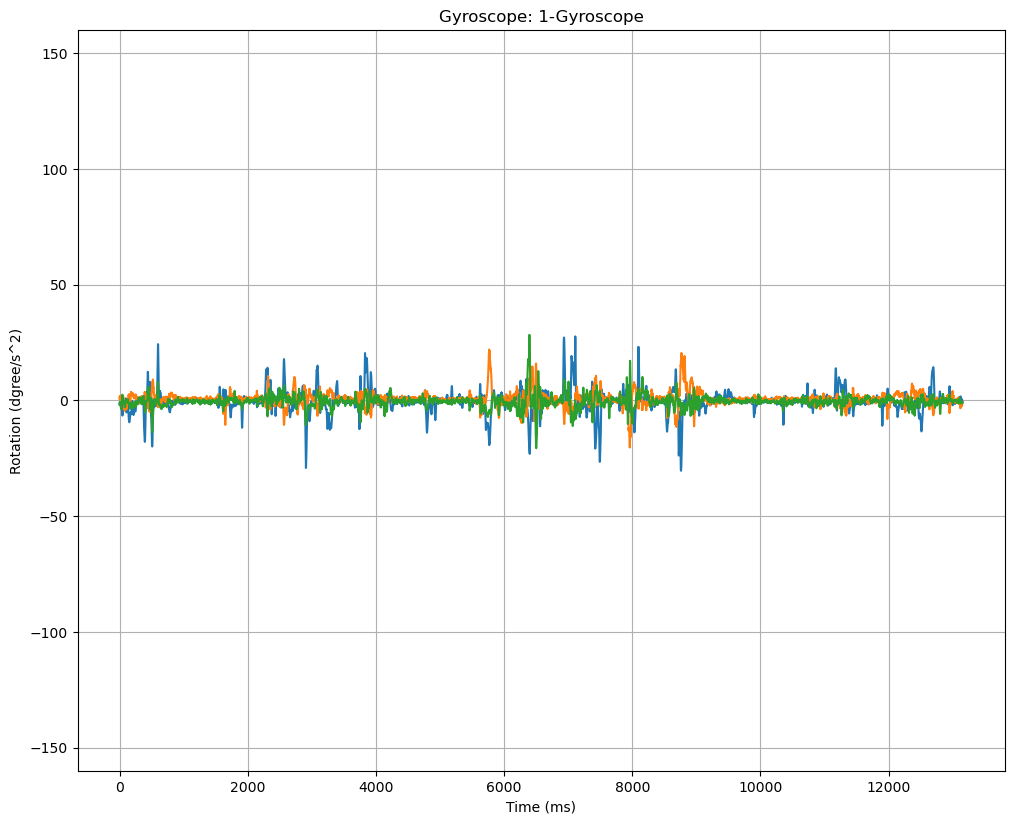

In [35]:
fig_gyroscope(reading_book_df[reading_book_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])


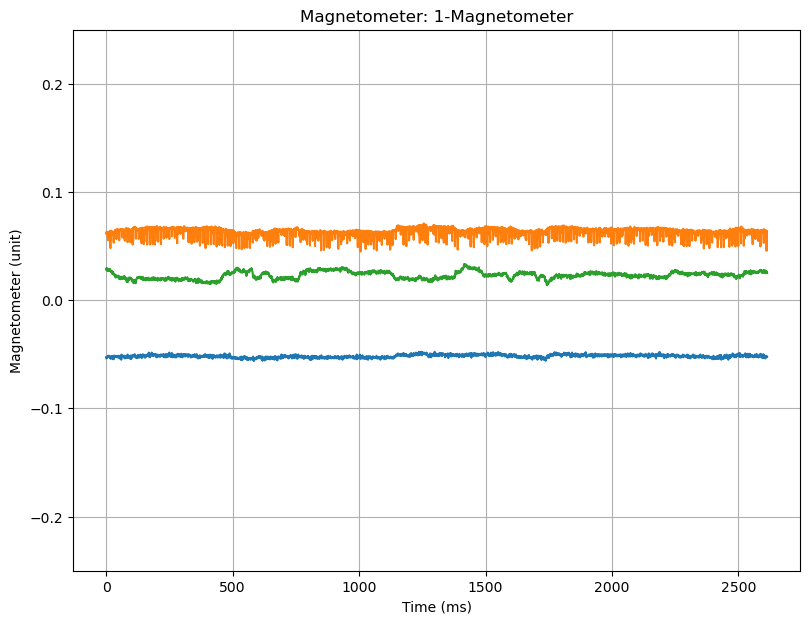

In [36]:
fig_magnetometer(reading_book_df[reading_book_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

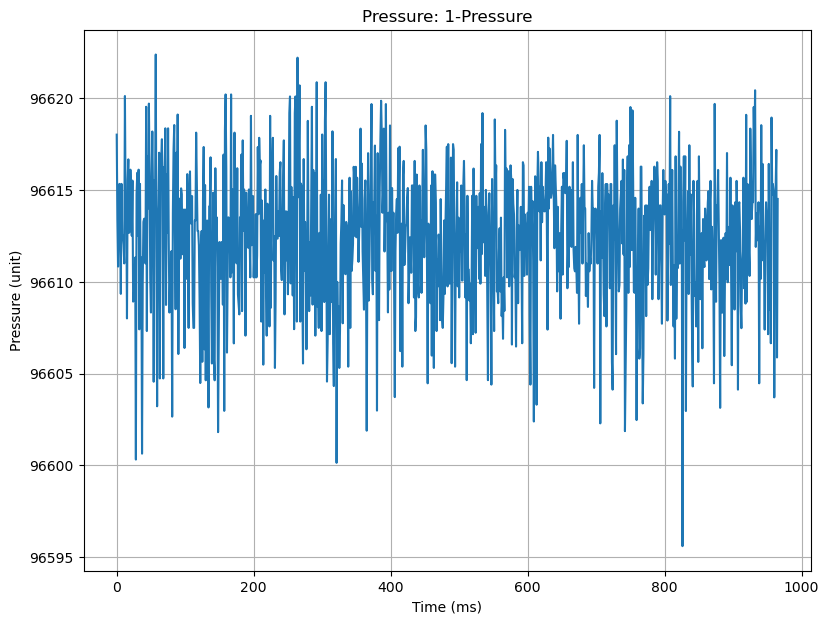

In [37]:
fig_presure(reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[1,:]["path"])


# Sitting and Using a Computer

In [38]:
# Using Computer Data
using_computer_df = df[df["exp_No"] == 2]

In [39]:
using_computer_df["sensor"].value_counts()

sensor
Magnetometer     35
Gyroscope        35
Pressure         35
Accelerometer    35
Name: count, dtype: int64

In [40]:
using_computer_df["expID"].value_counts()

expID
2      4
158    4
122    4
128    4
134    4
140    4
146    4
152    4
164    4
110    4
170    4
176    4
182    4
188    4
194    4
200    4
116    4
104    4
8      4
50     4
14     4
20     4
26     4
32     4
38     4
44     4
56     4
98     4
62     4
68     4
74     4
80     4
86     4
92     4
206    4
Name: count, dtype: int64

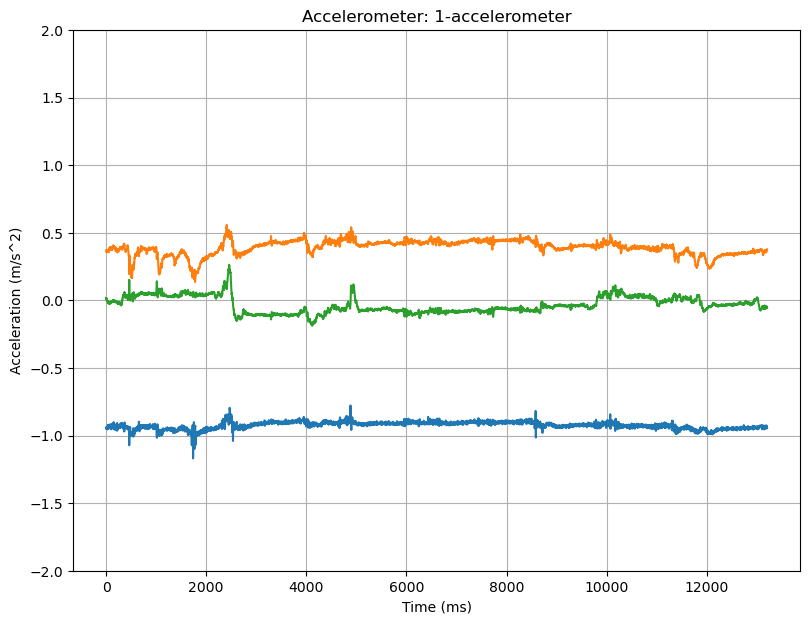

In [41]:
fig_accelerometer(using_computer_df[using_computer_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

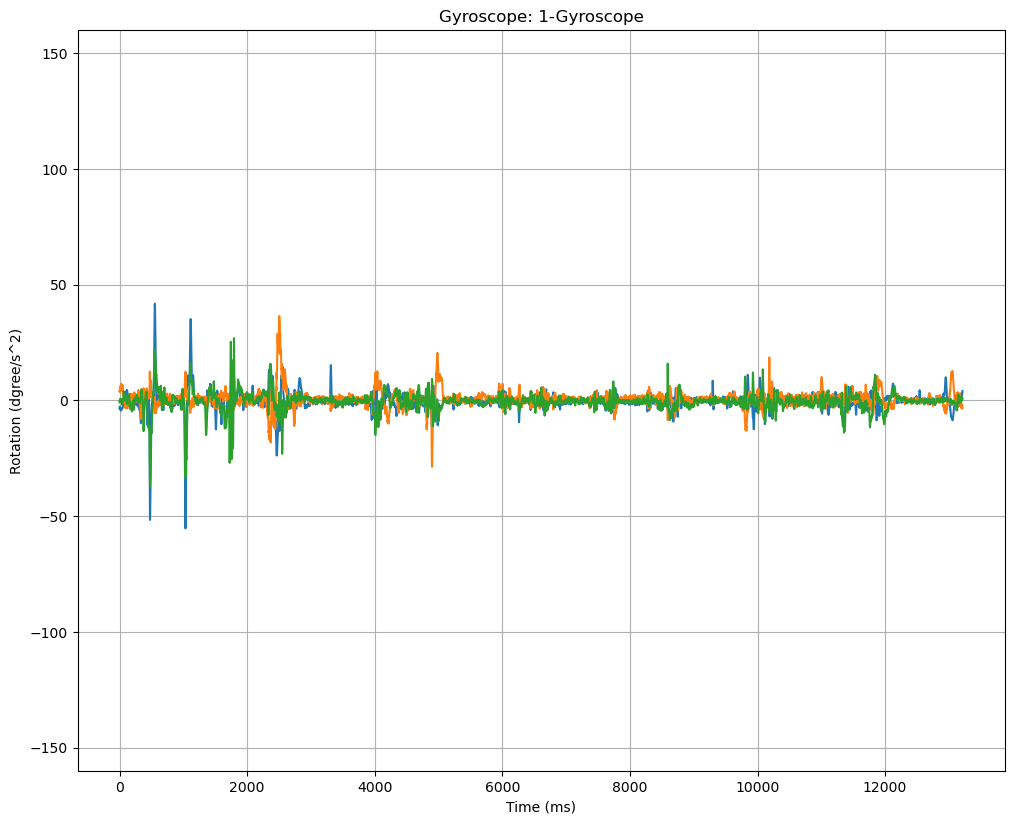

In [42]:
fig_gyroscope(using_computer_df[using_computer_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

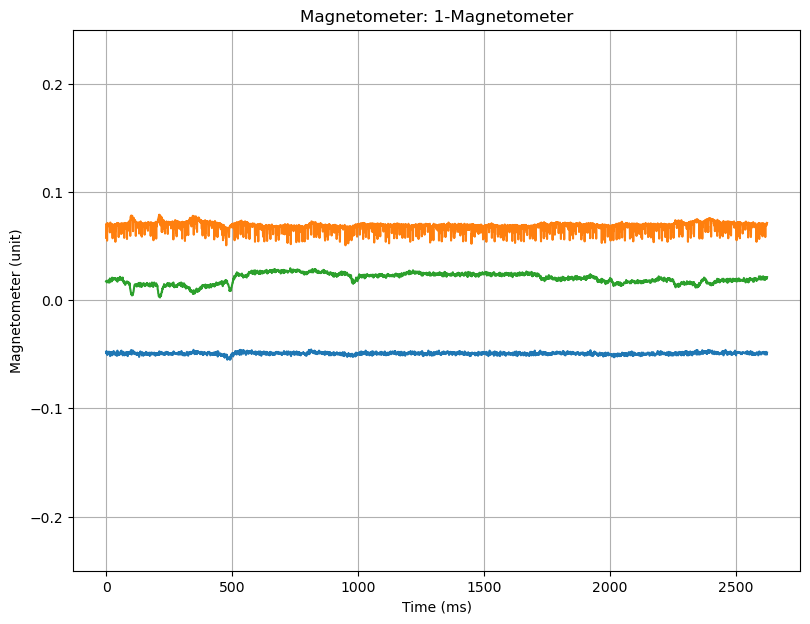

In [43]:
fig_magnetometer(using_computer_df[using_computer_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

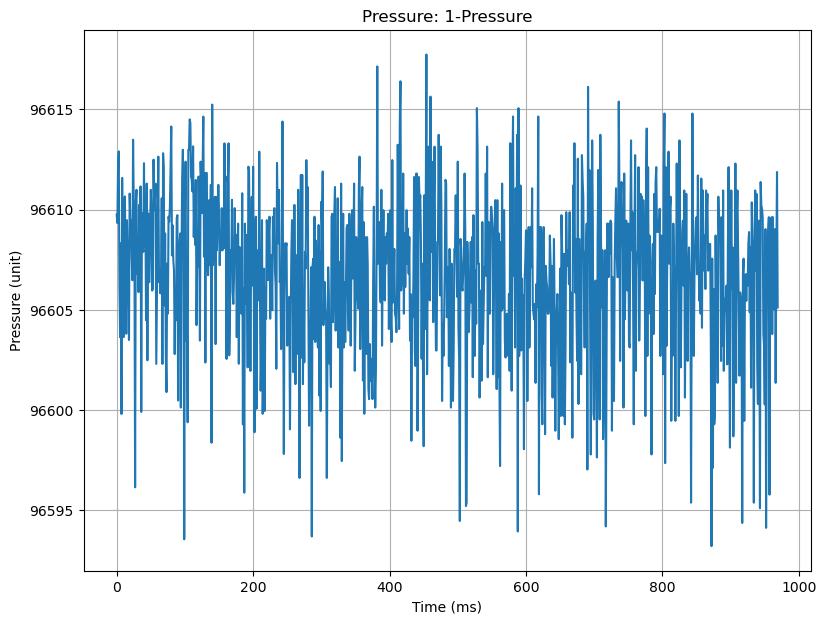

In [44]:
data_pre = pd.read_csv(using_computer_df[using_computer_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

# Standing up from sitting

In [45]:
# Stand up
stand_up_df = df[df["exp_No"] == 3]

In [46]:
stand_up_df["sensor"].value_counts()

sensor
Pressure         35
Gyroscope        35
Magnetometer     35
Accelerometer    35
Name: count, dtype: int64

In [47]:
stand_up_df["expID"].value_counts()

expID
3      4
159    4
123    4
129    4
135    4
141    4
147    4
153    4
165    4
111    4
171    4
177    4
183    4
189    4
195    4
201    4
117    4
105    4
9      4
51     4
15     4
21     4
27     4
33     4
39     4
45     4
57     4
99     4
63     4
69     4
75     4
81     4
87     4
93     4
207    4
Name: count, dtype: int64

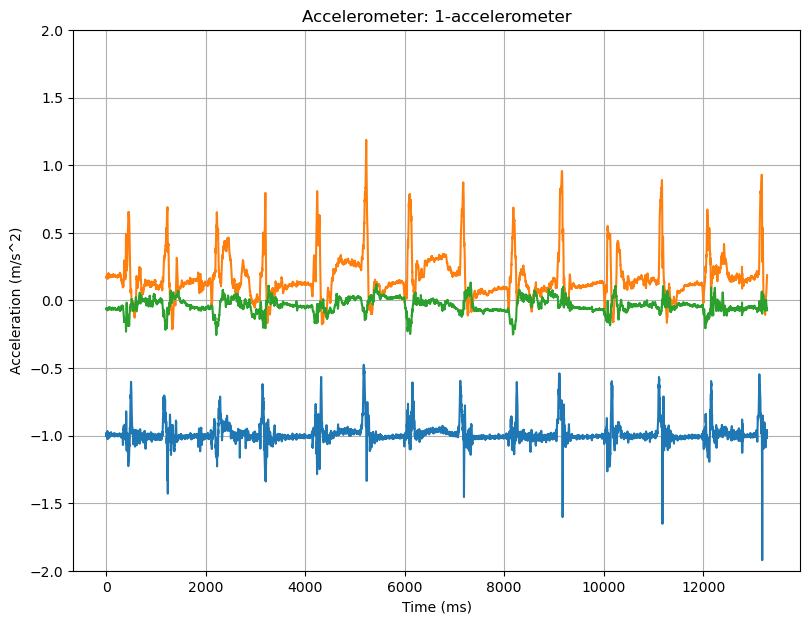

In [48]:
fig_accelerometer(stand_up_df[stand_up_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

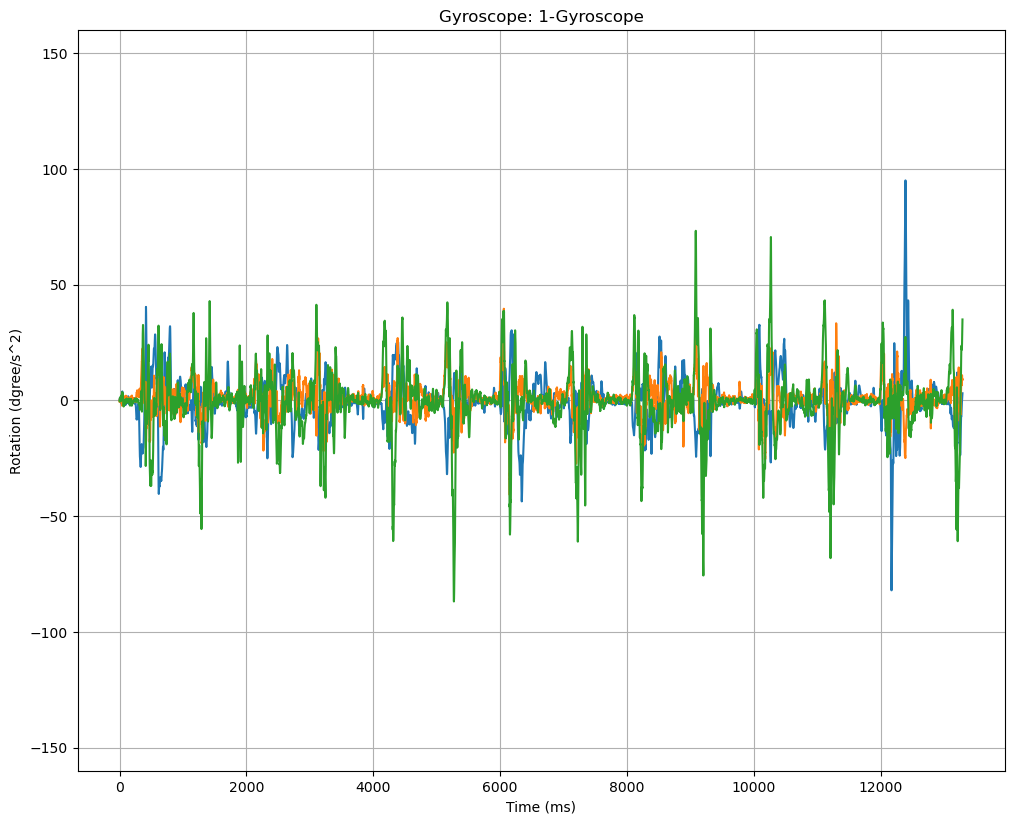

In [49]:
fig_gyroscope(stand_up_df[stand_up_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

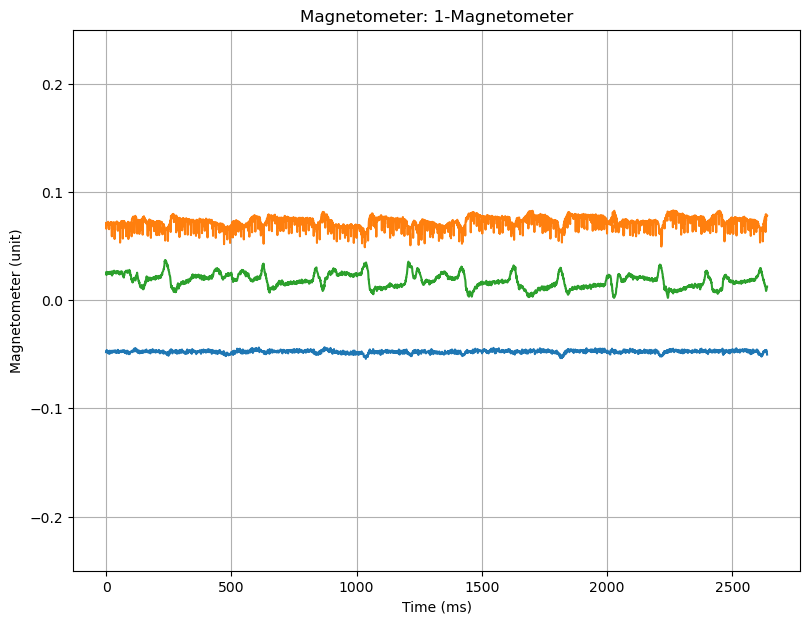

In [50]:
fig_magnetometer(stand_up_df[stand_up_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

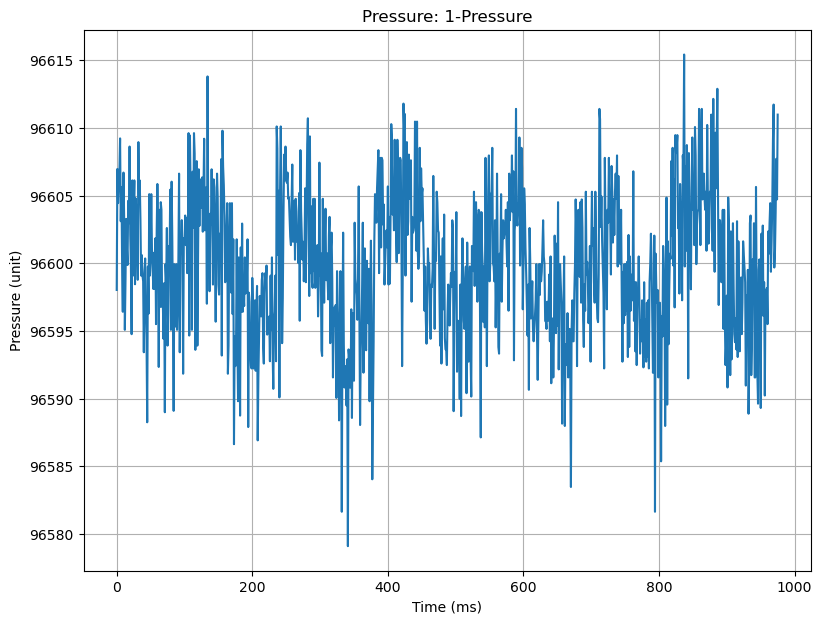

In [51]:
data_pre = pd.read_csv(stand_up_df[stand_up_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [52]:
data_pre

,pressure
0,96598.031
1,96606.969
2,96604.445
3,96605.953
4,96606.703
5,96609.227
6,96603.109
7,96605.641
8,96599.875
9,96596.422


In [53]:
data_pre.describe()

,pressure
count,976.000000
mean,96599.930633
std,5.298412
min,96579.109000
25%,96596.281000
50%,96599.938000
75%,96603.781000
max,96615.422000


# Walking


In [54]:
# Walking
walking_df = df[df["exp_No"] == 4]

In [55]:
walking_df["sensor"].value_counts()

sensor
Accelerometer    34
Magnetometer     34
Pressure         34
Gyroscope        34
Name: count, dtype: int64

In [56]:
walking_df["expID"].value_counts()

expID
4      4
154    4
118    4
124    4
130    4
136    4
142    4
148    4
160    4
10     4
166    4
172    4
178    4
184    4
190    4
202    4
112    4
106    4
100    4
94     4
88     4
82     4
76     4
70     4
64     4
58     4
52     4
46     4
40     4
34     4
28     4
22     4
16     4
208    4
Name: count, dtype: int64

In [57]:
walking_df["sensor"].value_counts()

sensor
Accelerometer    34
Magnetometer     34
Pressure         34
Gyroscope        34
Name: count, dtype: int64

In [58]:
walking_df["expID"].value_counts()

expID
4      4
154    4
118    4
124    4
130    4
136    4
142    4
148    4
160    4
10     4
166    4
172    4
178    4
184    4
190    4
202    4
112    4
106    4
100    4
94     4
88     4
82     4
76     4
70     4
64     4
58     4
52     4
46     4
40     4
34     4
28     4
22     4
16     4
208    4
Name: count, dtype: int64

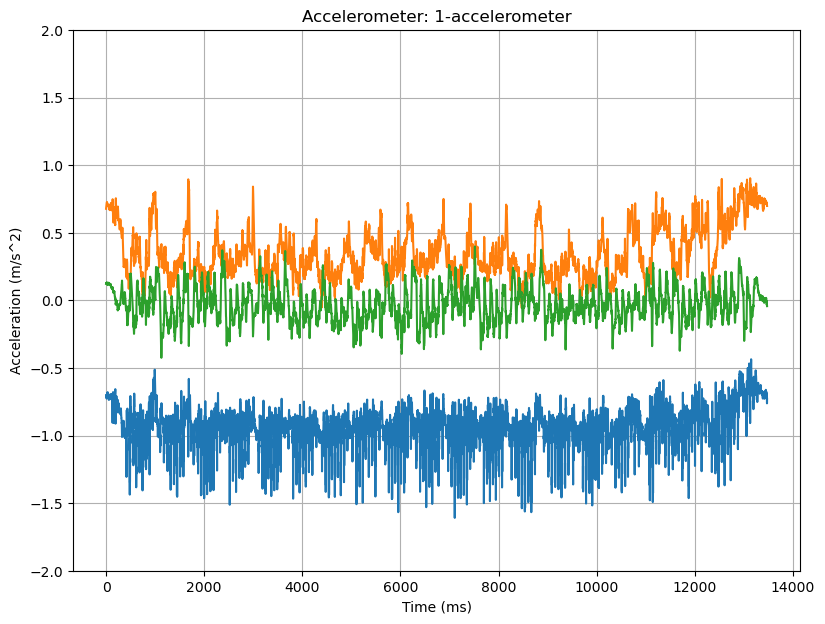

In [59]:
fig_accelerometer(walking_df[walking_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

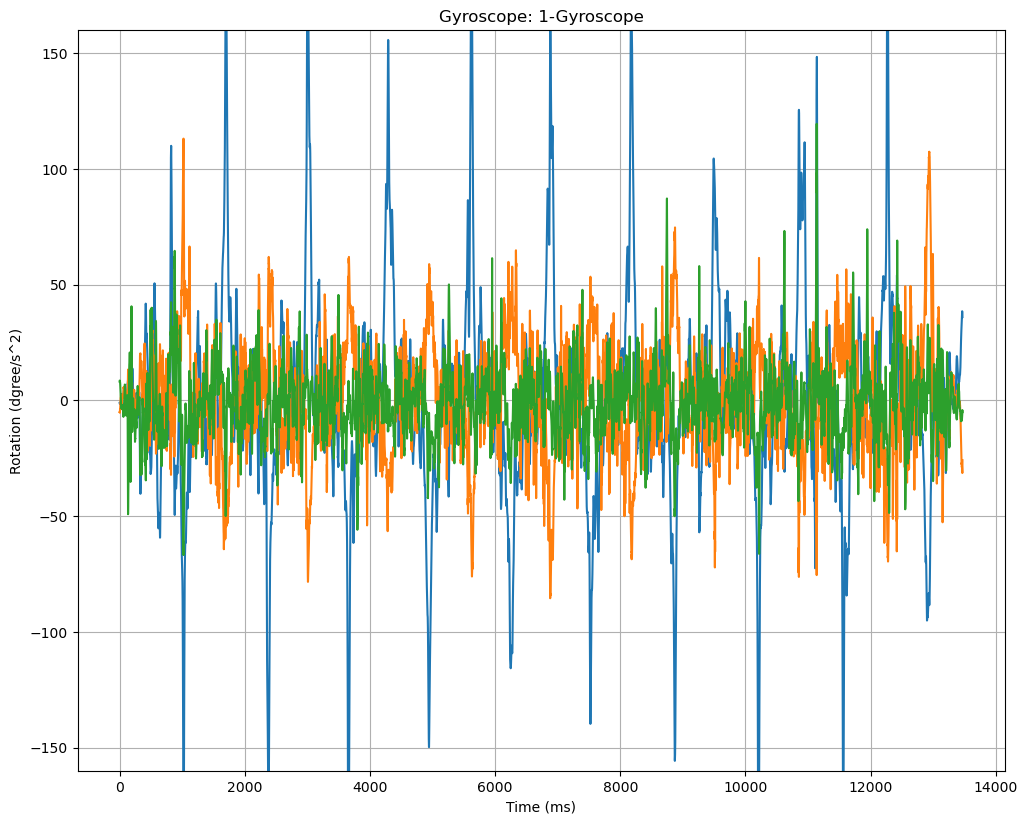

In [60]:
fig_gyroscope(walking_df[walking_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

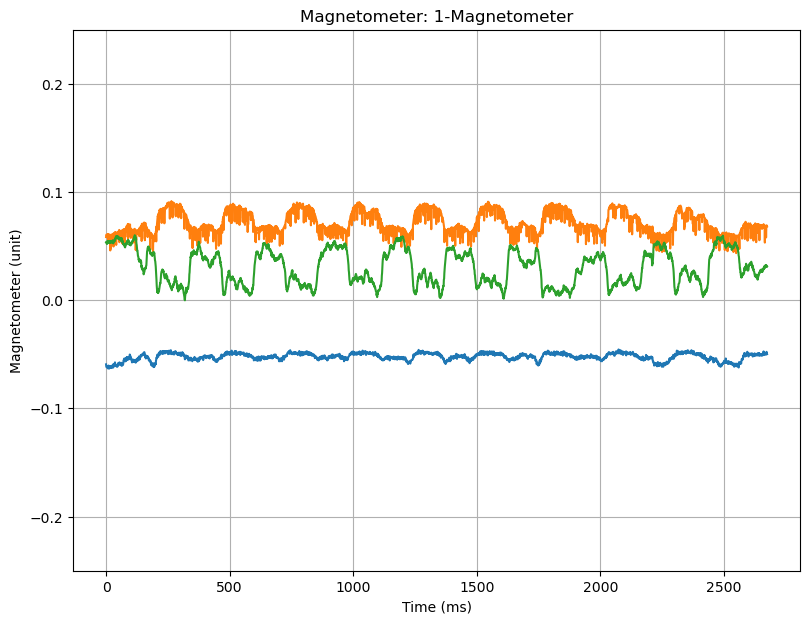

In [61]:
fig_magnetometer(walking_df[walking_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

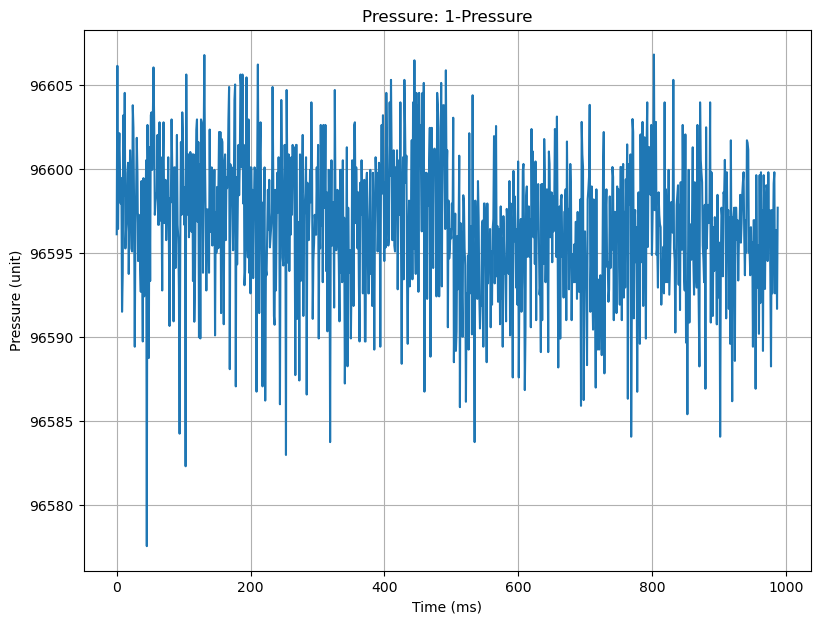

In [62]:
data_pre = pd.read_csv(walking_df[walking_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [63]:
data_pre.describe()

,pressure
count,989.000000
mean,96596.647688
std,4.306383
min,96577.563000
25%,96593.820000
50%,96597.094000
75%,96599.766000
max,96606.797000


# Standing and Picking items from the floor

In [64]:
# Picking up items
picking_up_items_df = df[df["exp_No"] == 5]

In [65]:
picking_up_items_df["sensor"].value_counts()

sensor
Magnetometer     34
Accelerometer    34
Gyroscope        34
Pressure         34
Name: count, dtype: int64

In [66]:
picking_up_items_df["expID"].value_counts()

expID
5      4
155    4
119    4
125    4
131    4
137    4
143    4
149    4
161    4
11     4
167    4
173    4
179    4
191    4
197    4
203    4
113    4
107    4
101    4
95     4
89     4
83     4
77     4
71     4
65     4
59     4
53     4
47     4
41     4
35     4
29     4
23     4
17     4
209    4
Name: count, dtype: int64

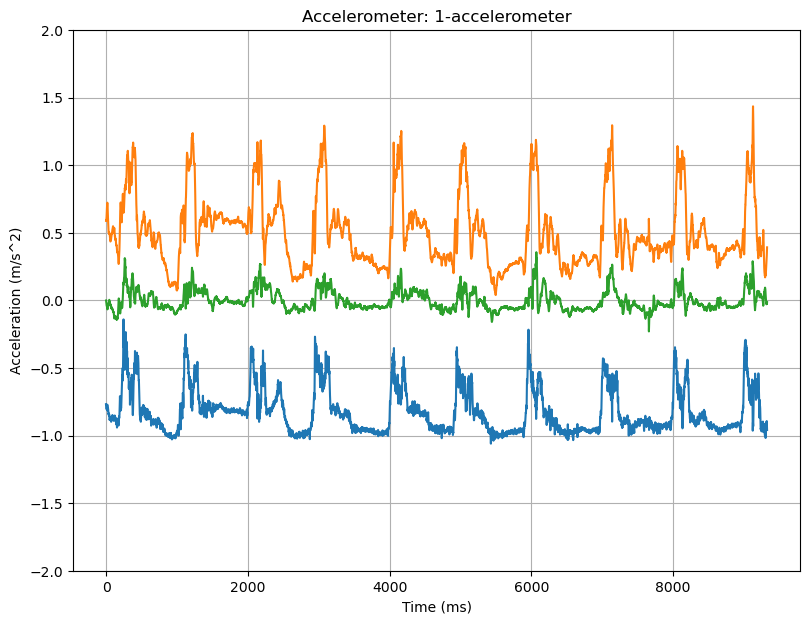

In [67]:
fig_accelerometer(picking_up_items_df[picking_up_items_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

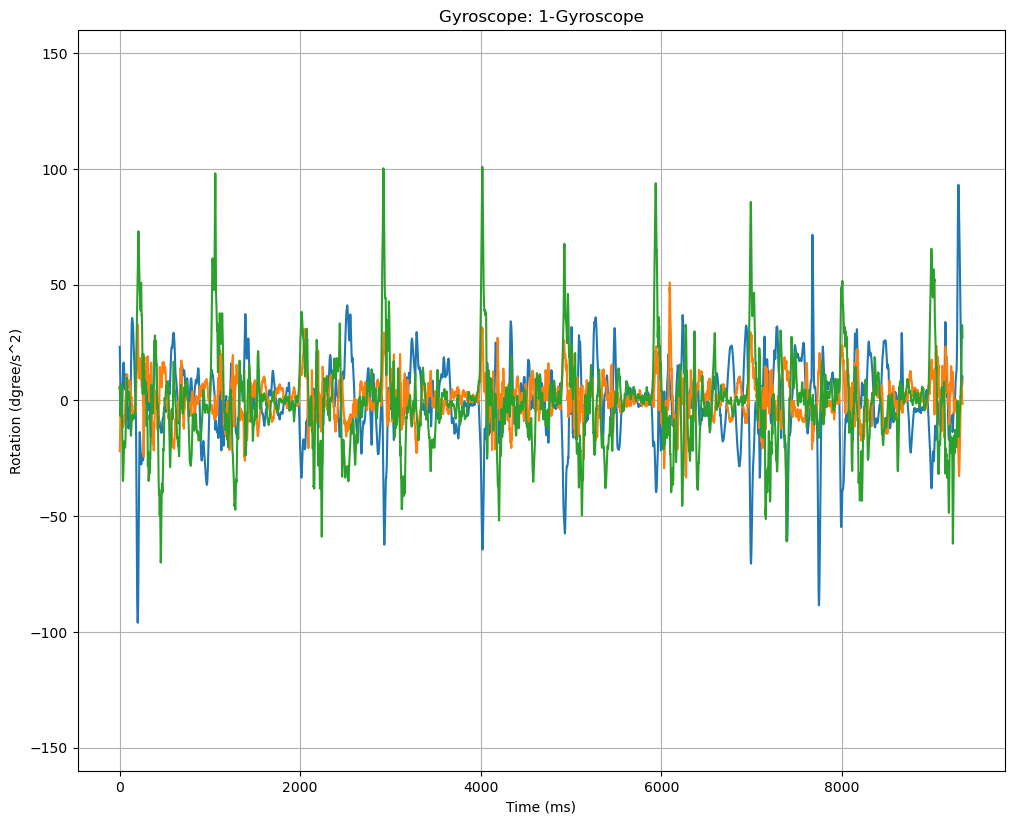

In [68]:
fig_gyroscope(picking_up_items_df[picking_up_items_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

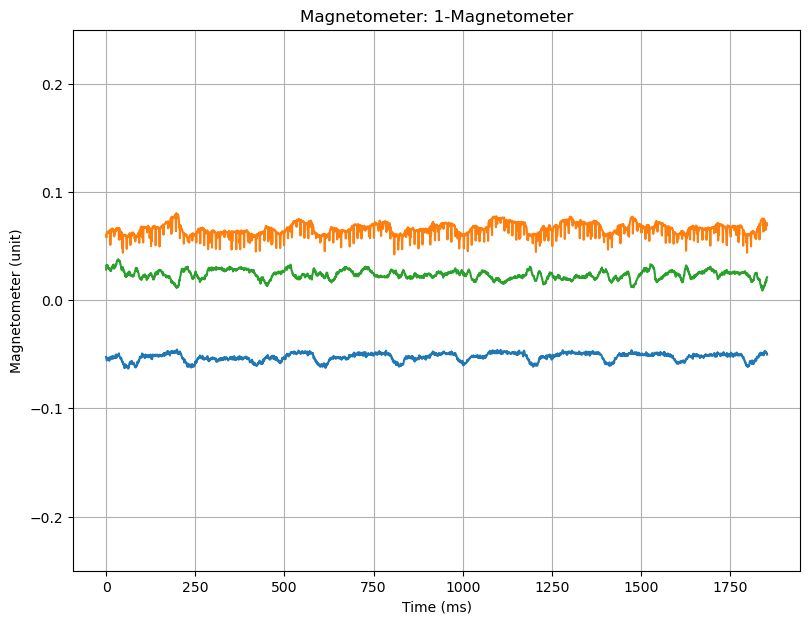

In [69]:
fig_magnetometer(picking_up_items_df[picking_up_items_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

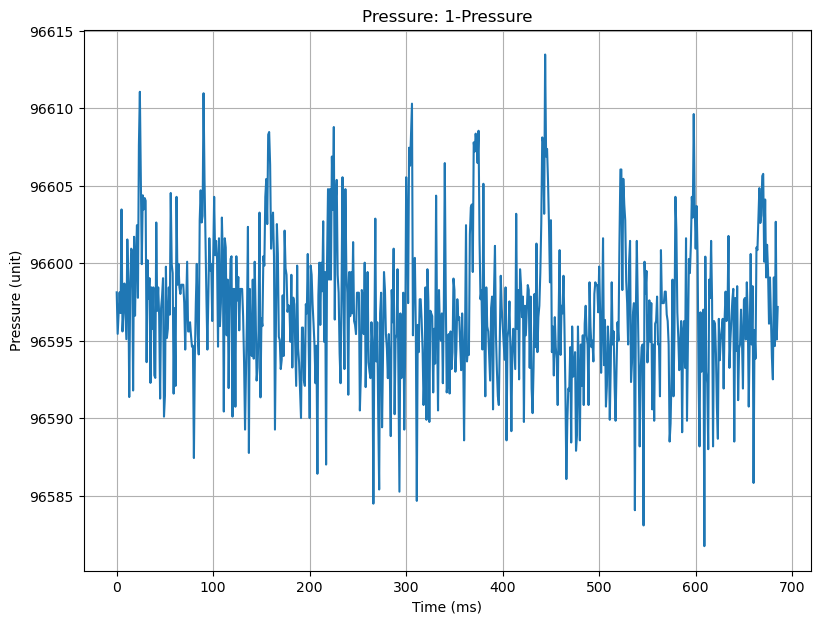

In [70]:
data_pre = pd.read_csv(picking_up_items_df[picking_up_items_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [71]:
data_pre.describe()

,pressure
count,686.000000
mean,96596.921866
std,4.644026
min,96581.750000
25%,96594.214500
50%,96596.703000
75%,96599.445000
max,96613.484000


# TUG test

In [72]:
# TUG test
tug_test_df = df[df["exp_No"] == 6]

In [73]:
tug_test_df["sensor"].value_counts()

sensor
Gyroscope        35
Magnetometer     35
Accelerometer    35
Pressure         35
Name: count, dtype: int64

In [74]:
tug_test_df["expID"].value_counts()

expID
6      4
162    4
126    4
132    4
138    4
144    4
150    4
156    4
168    4
114    4
174    4
180    4
186    4
192    4
198    4
204    4
120    4
108    4
12     4
54     4
18     4
24     4
30     4
36     4
42     4
48     4
60     4
102    4
66     4
72     4
78     4
84     4
90     4
96     4
210    4
Name: count, dtype: int64

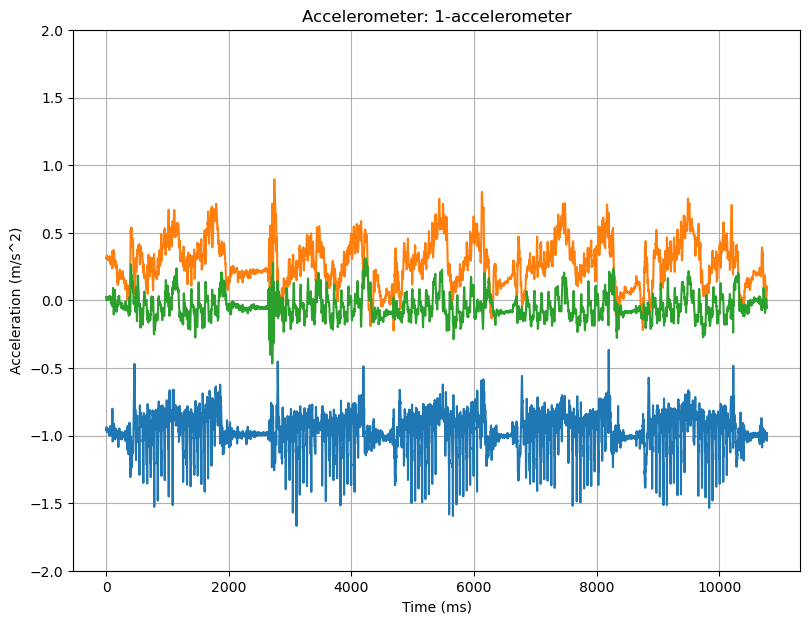

In [75]:
fig_accelerometer(tug_test_df[tug_test_df["sensor"] == "Accelerometer"].iloc[0,:]["path"])

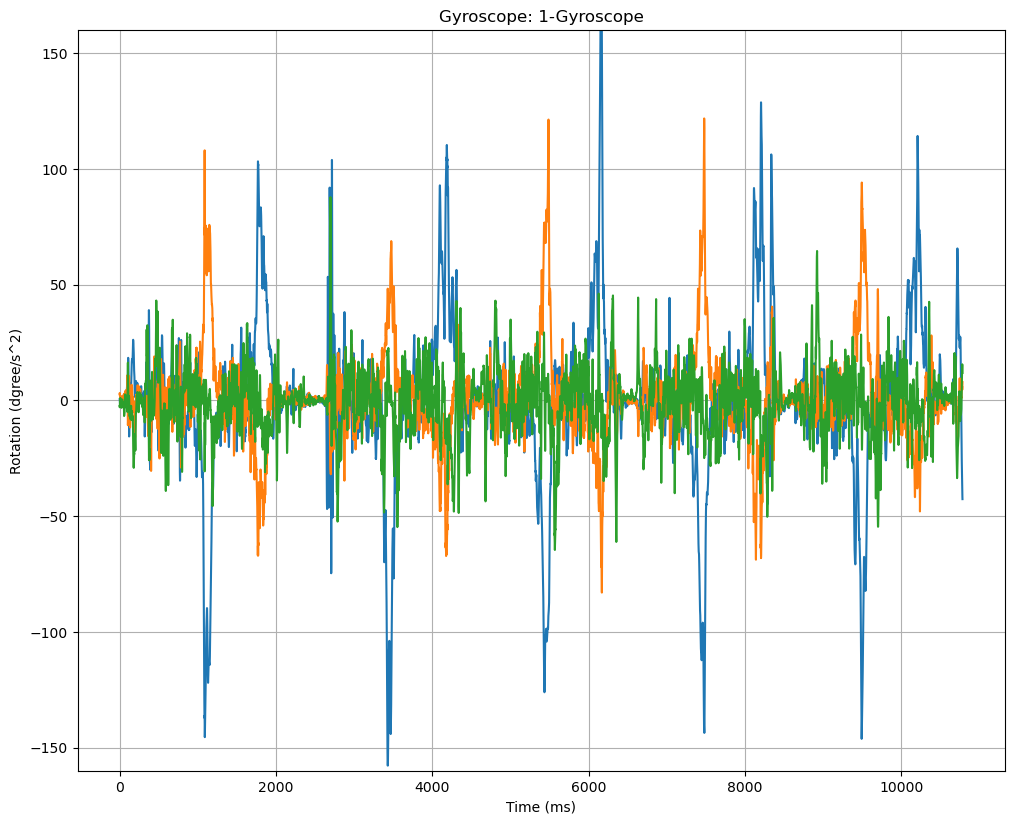

In [76]:
fig_gyroscope(tug_test_df[tug_test_df["sensor"] == "Gyroscope"].iloc[0,:]["path"])

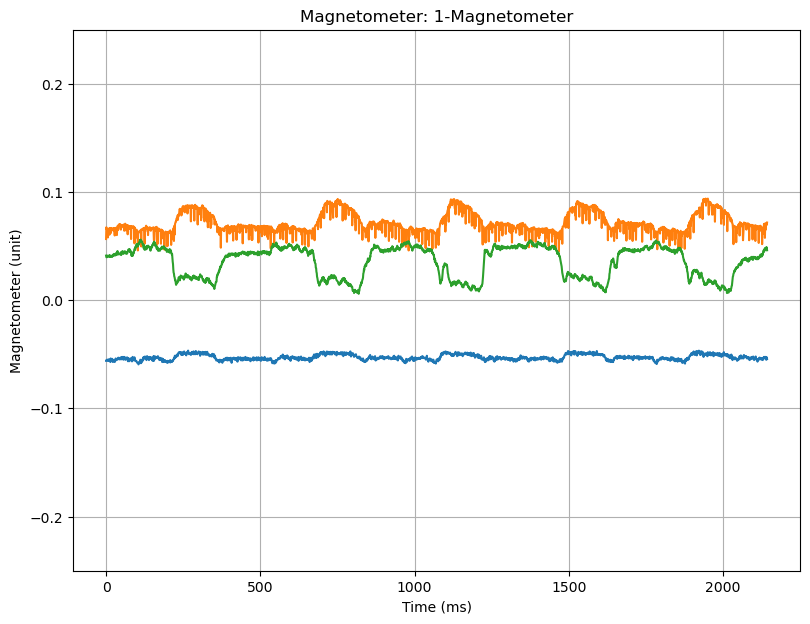

In [77]:
fig_magnetometer(tug_test_df[tug_test_df["sensor"] == "Magnetometer"].iloc[0,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

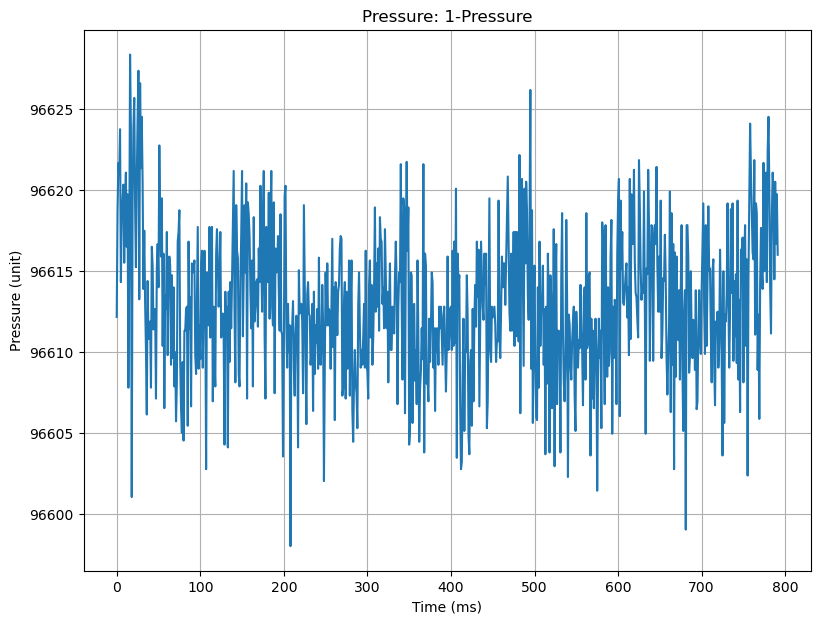

In [78]:
data_pre = pd.read_csv(tug_test_df[tug_test_df["sensor"] == "Pressure"].iloc[0,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [79]:
data_pre.describe()

,pressure
count,792.000000
mean,96612.945201
std,4.569659
min,96598.000000
25%,96609.969000
50%,96612.781000
75%,96615.875000
max,96628.344000


# Computing features

In [80]:
df[df["expID"] == 66]

,path,file,expID,sensor,frequency,exp_No,exp_Name
738,../Datasets/Dataset_2/User11/66_MetaWear_2022-...,66_MetaWear_2022-03-07T12.48.42.842_EB942CED94...,66,Gyroscope,100.000Hz,6,TUG test
740,../Datasets/Dataset_2/User11/66_MetaWear_2022-...,66_MetaWear_2022-03-07T12.48.42.842_EB942CED94...,66,Magnetometer,20.000Hz,6,TUG test
756,../Datasets/Dataset_2/User11/66_MetaWear_2022-...,66_MetaWear_2022-03-07T12.48.42.842_EB942CED94...,66,Pressure,7.330Hz,6,TUG test
758,../Datasets/Dataset_2/User11/66_MetaWear_2022-...,66_MetaWear_2022-03-07T12.48.42.842_EB942CED94...,66,Accelerometer,100.000Hz,6,TUG test


In [81]:
df.drop([84],inplace=True)

In [82]:
df["expID"].value_counts().index

Index([  1,   2, 133, 134, 135, 136, 137, 138, 139, 140,
       ...
        70,  71,  72,  73,  74,  75,  76,  77, 210,  25],
      dtype='int32', name='expID', length=208)

# Feature Extraction

In [ ]:
result_list = []
for exp_id in df["expID"].value_counts().index:

    temp_df = df[df["expID"] == exp_id]

    # Check if both required sensors are present
    if not {"Accelerometer", "Gyroscope"}.issubset(set(temp_df["sensor"])):
        continue

    acc_data = pd.read_csv(temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,0])
    #acc_data = acc_data[['x-axis (g)','y-axis (g)','z-axis (g)']] * 9.8 * 4
    acc_data.rename(columns={'x-axis (g)':'x','y-axis (g)':'y','z-axis (g)':'z'},inplace=True)
    acc_data = acc_data[['x','y','z']]

    gyr_data = pd.read_csv(temp_df[temp_df["sensor"] == "Gyroscope"].iloc[0,0])
    gyr_data.rename(columns={'x-axis (deg/s)':'x','y-axis (deg/s)':'y','z-axis (deg/s)':'z'},inplace=True)
    gyr_data = gyr_data[['x','y','z']]

    window_size = 100 # sampling rate
    step_size = window_size // 2  # 50% overlap
    j = 0
    for i in range(0, len(acc_data), step_size):
        window_acc_data = acc_data[i:i+window_size]
        if len(window_acc_data) < window_size:
            break
        #compute the features for the current window
        acc_x_mean = window_acc_data["x"].mean()
        acc_x_var = window_acc_data["y"].var()
        acc_y_mean = window_acc_data["z"].mean()
        acc_y_var = window_acc_data["y"].var()
        acc_z_mean = window_acc_data["z"].mean()
        acc_z_var = window_acc_data["z"].var()
        acc_sumxyz = window_acc_data.sum()
        acc_sum_mean = acc_sumxyz.mean()
        acc_sum_var = acc_sumxyz.var()
        acc_abssum = window_acc_data.abs().sum()
        acc_abssum_mean = acc_abssum.mean()
        acc_abssum_var = acc_abssum.var()
        acc_maxabssum = acc_abssum.max()


        window_data_gyr = gyr_data[i:i+window_size]
        #compute the features for the current window
        gyr_x_mean = window_data_gyr["x"].mean()
        gyr_x_var = window_data_gyr["x"].var()
        gyr_y_mean = window_data_gyr["y"].mean()
        gyr_y_var = window_data_gyr["y"].var()
        gyr_z_mean = window_data_gyr["z"].mean()
        gyr_z_var = window_data_gyr["z"].var()
        gyr_sumxyz = window_data_gyr.sum()
        gyr_sum_mean = gyr_sumxyz.mean()
        gyr_sum_var = gyr_sumxyz.var()
        gyr_abssum = window_data_gyr.abs().sum()
        gyr_abssum_mean = gyr_abssum.mean()
        gyr_abssum_var = gyr_abssum.var()
        gyr_maxabssum = gyr_abssum.max()
        result_list.append([acc_x_mean, acc_x_var, acc_y_mean,
                              acc_y_var, acc_z_mean, acc_z_var,
                              acc_sum_mean, acc_abssum_mean, acc_sum_var,
                              acc_abssum_var, acc_maxabssum, gyr_x_mean,
                              gyr_x_var, gyr_y_mean, gyr_y_var,
                              gyr_z_mean, gyr_z_var, gyr_sum_mean,
                              gyr_abssum_mean, gyr_sum_var, gyr_abssum_var,
                              gyr_maxabssum, temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,5]])


In [84]:
result_df = pd.DataFrame(result_list)

In [ ]:
result_df.to_csv("Selected_Feature_50percent_overlap.csv")

In [86]:
result_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.98099,0.000057,-0.20195,0.000057,-0.20195,0.000057,-34.957000,43.905667,3272.726604,2214.153029,...,1.51230,3.540294,0.24149,2.559997,38.864667,128.868667,1.118899e+04,6.153699e+02,155.988,1
1,-0.97937,0.000025,-0.20509,0.000025,-0.20509,0.000016,-34.955667,44.008333,3265.484197,2193.232041,...,0.55320,0.219386,-0.24879,0.433753,-12.660667,71.212667,3.940048e+03,4.045667e+02,94.279,1
2,-0.99545,0.006806,-0.15962,0.006806,-0.15962,0.006339,-34.198667,43.568000,3411.019992,2351.702959,...,-4.40847,89.808838,-12.46034,348.439095,-1731.360000,1776.168667,2.527285e+06,2.423481e+06,3519.155,1
3,-1.01098,0.009715,-0.08560,0.009715,-0.08560,0.004819,-34.302000,39.572667,3404.893548,2839.442297,...,-3.24025,103.982735,-11.81332,397.122036,-1712.964333,1987.441667,2.950190e+06,2.573571e+06,3761.708,1
4,-1.01176,0.000288,-0.06231,0.000288,-0.06231,0.000092,-34.938667,36.673333,3309.995166,3123.717986,...,1.14694,5.284554,1.30734,35.649931,32.214667,313.927333,2.463471e+04,9.791402e+03,413.906,1
